# Import Libraries 

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Import Dataset

In [5]:
data = pd.read_csv('https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/639388c2cbc2120a14dcf466e85730eb8be498bb/iris.csv')

In [151]:
data

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


# Manual Step by Step

## Standarlize raw data

In [1]:
from sklearn.preprocessing import StandardScaler

In [39]:
#standarlize the data by columns and make it into a dataframe
scaler = StandardScaler()
data_scaled = pd.DataFrame(data = scaler.fit_transform(data.iloc[:,:-1]), index = data.index, columns = list(data)[:-1])
data_scaled = pd.concat([data_scaled, data.iloc[:,-1]],axis = 1) # add labels to the scaled data

data_scaled

,sepal_length,sepal_width,petal_length,petal_width,species
0,-0.900681,1.032057,-1.341272,-1.312977,setosa
1,-1.143017,-0.124958,-1.341272,-1.312977,setosa
2,-1.385353,0.337848,-1.398138,-1.312977,setosa
3,-1.506521,0.106445,-1.284407,-1.312977,setosa
4,-1.021849,1.263460,-1.341272,-1.312977,setosa
...,...,...,...,...,...
145,1.038005,-0.124958,0.819624,1.447956,virginica
146,0.553333,-1.281972,0.705893,0.922064,virginica
147,0.795669,-0.124958,0.819624,1.053537,virginica
148,0.432165,0.800654,0.933356,1.447956,virginica


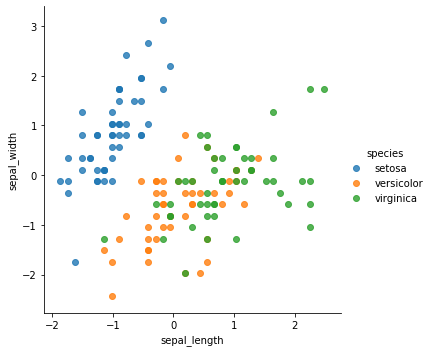

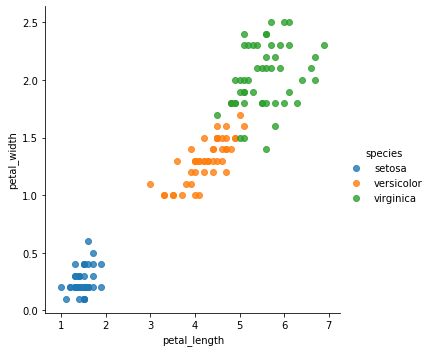

In [58]:

# fig, ax =plt.subplots(1,2)
sns.lmplot(x="sepal_length", y="sepal_width", data=data_scaled, hue="species", fit_reg=False, legend=True,legend_out=True)
sns.lmplot(x="petal_length", y="petal_width", data=iris_db, hue="species", fit_reg=False, legend=True,legend_out=True)


## Compute covariance matrix

In [67]:
cov_matrix = np.cov(data_scaled.iloc[:,:-1].T)
cov_matrix

array([[ 1.00671141, -0.11010327,  0.87760486,  0.82344326],
       [-0.11010327,  1.00671141, -0.42333835, -0.358937  ],
       [ 0.87760486, -0.42333835,  1.00671141,  0.96921855],
       [ 0.82344326, -0.358937  ,  0.96921855,  1.00671141]])

## Compute eigenvalues an deigenvectors of the covariance matrix

In [105]:
w, v = np.linalg.eig(cov_matrix)
print("eigenvalues: ", w)
print("eigenvevtors", v)

explained_var = w/sum(w)
print("explained valriance: ",  explained_var)

eigenvalues:  [2.93035378 0.92740362 0.14834223 0.02074601]
eigenvevtors [[ 0.52237162 -0.37231836 -0.72101681  0.26199559]
 [-0.26335492 -0.92555649  0.24203288 -0.12413481]
 [ 0.58125401 -0.02109478  0.14089226 -0.80115427]
 [ 0.56561105 -0.06541577  0.6338014   0.52354627]]
explained valriance:  [0.72770452 0.23030523 0.03683832 0.00515193]


In [ ]:
## Project scaled data onto the feature vectors

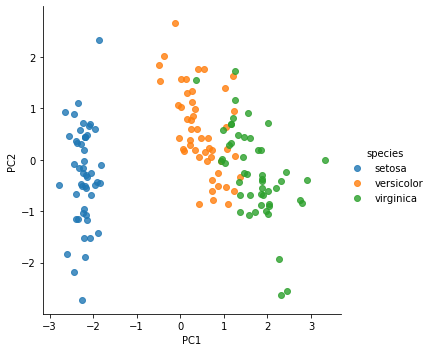

In [149]:
pc_num = 2 # select the principal components to form the feature vectors
data_transformed = np.matmul(v[:,:pc_num].T, data_scaled.iloc[:,:-1].T.values).T 

data_transformed = pd.DataFrame(data = data_transformed, index = data.index, columns = ['PC1', 'PC2'])
data_transformed = pd.concat([data_transformed, data.iloc[:,-1]],axis = 1) # add labels to the scaled data

sns.lmplot(x="PC1", y="PC2", data=data_transformed, hue="species", fit_reg=False, legend=True,legend_out=True)


# Principle Componenet Analysis (PCA)

In [82]:
from sklearn import decomposition

explained variance ratio (first two components): [0.72770452 0.23030523 0.03683832 0.00515193]


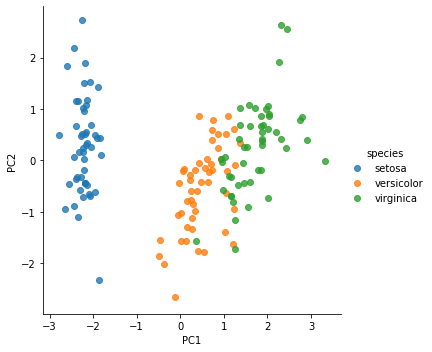

In [147]:
pca = decomposition.PCA(n_components=4)
pc = pca.fit_transform(data_scaled.iloc[:,:-1])

data_transformed = pd.DataFrame(data = pc, index = data.index, columns = ['PC1', 'PC2','PC3', 'PC4' ])
data_transformed = pd.concat([data_transformed, data.iloc[:,-1]],axis = 1) # add labels to the scaled data
print('explained variance ratio (first two components): %s' % str(pca.explained_variance_ratio_))
sns.lmplot(x="PC1", y="PC2", data=data_transformed, hue="species", fit_reg=False, legend=True,legend_out=True)
